This notebook will handle the initial reading in of the dataset.  
Data types will be assesed to the minimize memory footprint of the dataset.  
The some values will be selected to ascertain the origin of this data through a Google search.  
The results will reveal the proper business domain to guide best use case for this analysis.  
This will result in the formulation of business questions to be addressed.  
Summary statistical plots will be made to observe trends in user activity.  
The data will be wrangled to engineer the necessary features to solve the business problem stated.  
The final dataset will be exported to be used for machine learning in other notebooks.

In [1]:
# set cell display width
from IPython.display import display, HTML
display(HTML('<style>.container { width: 930px !important; }</style>'))

In [2]:
# import ML tools
import numpy as np
import pandas as pd

In [3]:
# import plotting tools
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.pylabtools import figsize
from matplotlib.lines import Line2D
# set grid size and style
figsize(12, 4)
sns.set_style('whitegrid')

Use "my_palette.colors(<index>)" as color attribute for Seaborn plots.
This is your color palette...


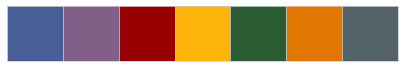

In [4]:
# import custom palette
import my_palette as mp

In [5]:
# free autocomplete from Jedi mind control
%config Completer.use_jedi = False

In [6]:
# read in dataset and observe basic infomation
df = pd.read_csv('../data/eluvio_ds_challenge.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509236 entries, 0 to 509235
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   time_created  509236 non-null  int64 
 1   date_created  509236 non-null  object
 2   up_votes      509236 non-null  int64 
 3   down_votes    509236 non-null  int64 
 4   title         509236 non-null  object
 5   over_18       509236 non-null  bool  
 6   author        509236 non-null  object
 7   category      509236 non-null  object
dtypes: bool(1), int64(3), object(4)
memory usage: 27.7+ MB


> **FIND BUSINESS DOMAIN**

I'll observe some of the article authors and titles to begin a search for the origin of the data.

In [7]:
# observe some entries
df.head(20)

,time_created,date_created,up_votes,down_votes,title,over_18,author,category
0,1201232046,2008-01-25,3,0,Scores killed in Pakistan clashes,False,polar,worldnews
1,1201232075,2008-01-25,2,0,Japan resumes refuelling mission,False,polar,worldnews
2,1201232523,2008-01-25,3,0,US presses Egypt on Gaza border,False,polar,worldnews
3,1201233290,2008-01-25,1,0,Jump-start economy: Give health care to all,False,fadi420,worldnews
4,1201274720,2008-01-25,4,0,Council of Europe bashes EU&UN terror blacklist,False,mhermans,worldnews
5,1201287889,2008-01-25,15,0,Hay presto! Farmer unveils the illegal mock-...,False,Armagedonovich,worldnews
6,1201289438,2008-01-25,5,0,"Strikes, Protests and Gridlock at the Poland-U...",False,Clythos,worldnews
7,1201536662,2008-01-28,0,0,The U.N. Mismanagement Program,False,Moldavite,worldnews
8,1201558396,2008-01-28,4,0,Nicolas Sarkozy threatens to sue Ryanair,False,Moldavite,worldnews
9,1201635869,2008-01-29,3,0,US plans for missile shields in Polish town me...,False,JoeyRamone63,worldnews


After Googling some of these author names and titles, I discovered this dataset was part of a Kaggle competition.  
The data was taken from a subreddit, called "worldnews", from January 2008 until November 2016.

Since the challenge mentions RAM size as a bottleneck, I'll start with compressing the data.

> **REDUCE MEMORY SIZE**

In [8]:
# observe memory distribution across DataFrame
df.memory_usage()

Index               128
time_created    4073888
date_created    4073888
up_votes        4073888
down_votes      4073888
title           4073888
over_18          509236
author          4073888
category        4073888
dtype: int64

In [9]:
# create bytes convertion factor
BYTES_PER_MEBIBYTE = (2**10)**2
BYTES_PER_MEBIBYTE

1048576

In [10]:
# observe initial memory size
START_MEMORY = df.memory_usage().sum() / BYTES_PER_MEBIBYTE
print(f'Initial Memory Size: {START_MEMORY:.3f} MiB')

Initial Memory Size: 27.682 MiB


I'll start with the down votes.

In [11]:
# observe distribution of down votes
df['down_votes'].value_counts()

0    509236
Name: down_votes, dtype: int64

The down votes are all zero valued.  
This feature holds no information.

In [12]:
# remove down voteS column
df.drop(['down_votes'], axis=1, inplace=True)
# show new memory size
current_memory = df.memory_usage().sum() / BYTES_PER_MEBIBYTE
print(f'New Memory Size: {current_memory:.3f} MiB')

New Memory Size: 23.797 MiB


Now, I'll turn to the category feature.

In [13]:
# observe distribution of category
df['category'].value_counts()

worldnews    509236
Name: category, dtype: int64

This feature is not useful, either.

In [14]:
# remove category column
df.drop(['category'], axis=1, inplace=True)
# show new memory size
current_memory = df.memory_usage().sum() / BYTES_PER_MEBIBYTE
print(f'New Memory Size: {current_memory:.3f} MiB')

New Memory Size: 19.912 MiB


I'll look at the up votes, now.

In [15]:
# show data type and range of values for up votes
print(f"Data Type: {df['up_votes'].dtype} \
    Max Val: {df['up_votes'].max()} \
    Min Val: {df['up_votes'].min()}")

Data Type: int64     Max Val: 21253     Min Val: 0


In [16]:
# show range of values that can be cast as Numpy 16 bit integer
np.iinfo(np.int16)

iinfo(min=-32768, max=32767, dtype=int16)

I can store this feature as a smaller data type.

In [17]:
# convert upvote column to Numpy 16 bit integer
df['up_votes'] = df['up_votes'].astype('int16')
# show new memory size
current_memory = df.memory_usage().sum() / BYTES_PER_MEBIBYTE
print(f'New Memory Size: {current_memory:.3f} MiB')

New Memory Size: 16.998 MiB


In [18]:
# show memory size reduction from initial size
print(f'Memory Size Reduction:\
    {np.int((START_MEMORY - current_memory) / START_MEMORY * 100)}%')

Memory Size Reduction:    38%


This is the percent that the memory footprint was reduced, before feature engineering.

Before continuing, I will verify that all creation times are within the stated range.

In [19]:
# get earlist and latest times
time_earliest = df['time_created'][0]
time_latest = df['time_created'].iloc[-1]
# check for data points out of time range
df.loc[(df['time_created'] < time_earliest) | (df['time_created'] > time_latest)]

,time_created,date_created,up_votes,title,over_18,author


I will check on missing data from the string objects, as well.

In [20]:
# look for empty strings
df[['date_created', 'title', 'author']].isin(['']).sum()

date_created    0
title           0
author          0
dtype: int64

Despite wanting to reduce the required memory, I will add some features to improve the model's predictive power.

> **FEATURE ENGINEERING**

Reddit gets its revenue from advertising and premium subscriptions that remove the ads.  
I will assume the pricing of advertisements is proportional to the click-through rate those ads generate.  
From a revenue perspective, having more active users for longer durations will increase the number of click-throughs.  
A business goal would be to increase user participation, leading to higher ad pricing.  
So, this begs the question:  
"Given the current data, which articles lead to incresed user participation?"

There are two ways that I will look at this question. 
1. IMPULSIVE SELECTION  
Assume that the words comprising the titles of the articles are influencing users to read the articles in the moment.  
This perspective views the up votes for each article as being independent of those for other articles.  
2. SELECTION  BY AUTHOR  
Assume that the authors are influencing the amount of user activity.   
Authors may be building up a following of readers, who trust that the articles the authors posts will be preferred.  

I suspect that the truth is some combination of both factors.  
The author may be heuristically selecting more interesting article titles.  
This may be a way to grab the attention of infrequent users with less randomness.

> **CYCLICAL TIME FEATURES**

At this point, I would like to extract some cyclical time data from the time created feature.  
Since the feature's values are expressed in seconds, I will create a new feature to represent the seconds of the day.   
Unfortunately, the seconds in a day is discontinuous, when one day transitions to the next.  
That is, the seconds reset to zero at midnight.

In [21]:
# get epoch time for midnight previous to start of time data
first_midnight = pd.Series(pd.to_datetime(
    '2008-01-25T00:00:00')).apply(
    lambda x: x.timestamp())[0]
first_midnight

1201219200.0

In [22]:
# calculate seconds in a day
sec_in_day = 24 * 60 * 60
sec_in_day

86400

In [23]:
# get time of day as its count in seconds from midnight
discontinuous_seconds = (df['time_created'][100:500] - first_midnight) % sec_in_day
discontinuous_seconds[:10]

100    85798.0
101    72837.0
102    72857.0
103    24218.0
104    25541.0
105    52036.0
106    58576.0
107    58588.0
108    61363.0
109    61370.0
Name: time_created, dtype: float64

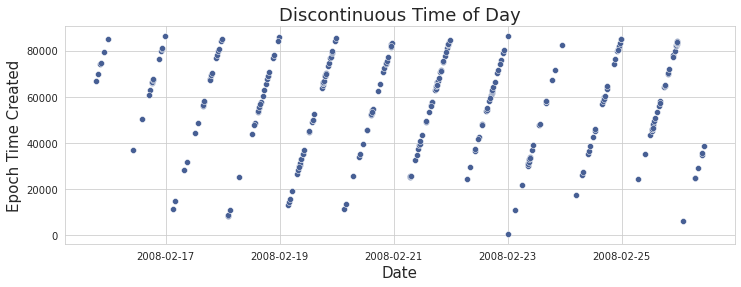

In [24]:
# plot time of day to show that it is discontinuous at midnight

sns.scatterplot(x=pd.to_datetime(df['time_created'], unit='s'), 
             y=discontinuous_seconds[100:], color=mp.colors(0))

plt.xlabel('Date', fontsize=15)
plt.ylabel('Epoch Time Created', fontsize=15)

plt.title('Discontinuous Time of Day', fontsize=18);

I will use a Fourier Transformation to represent the seconds of the day as a smooth linear variable.

In [25]:
# compute cyclical time variables
df['sin_second'] = np.sin(2 * np.pi * df['time_created'] / sec_in_day)
df['cos_second'] = np.cos(2 * np.pi * df['time_created'] / sec_in_day)
# show first 5 variable pairs
list(zip(df['sin_second'][:5], df['cos_second'][:5]))

[(0.8041163244860507, 0.5944719814213655),
 (0.8053682408058003, 0.5927748279923587),
 (0.8242497396725587, 0.5662264270145992),
 (0.8545343820848559, 0.5193948303890341),
 (-0.7807940266757893, -0.6247885145450472)]

I want to scale the discontinuous seconds to be between -1 and 1, in order to plot them with the new values.

In [26]:
# scale discontinuous time variable to be between -1 and 1
scaled_sec = 2 * (discontinuous_seconds - discontinuous_seconds.min()
                 ) / (discontinuous_seconds.max() - discontinuous_seconds.min()) - 1
scaled_sec[:10]

100    0.989336
101    0.687552
102    0.688018
103   -0.444491
104   -0.413686
105    0.203223
106    0.355500
107    0.355779
108    0.420392
109    0.420555
Name: time_created, dtype: float64

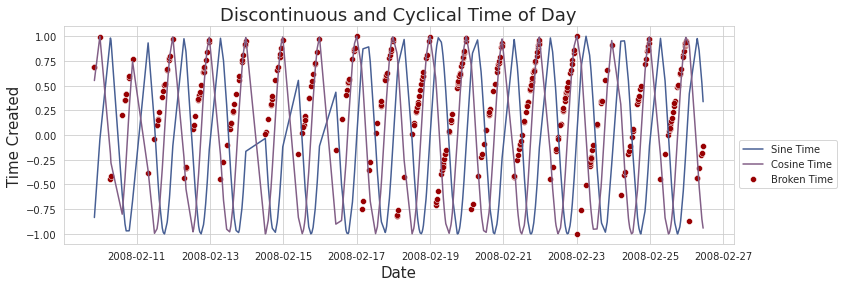

In [27]:
# plot discontinuous time of day and cyclical time to compare

sns.lineplot(x=pd.to_datetime(df['time_created'], unit='s'), 
             y=df['sin_second'][100:500], color=mp.colors(0), label='Sine Time')
sns.lineplot(x=pd.to_datetime(df['time_created'], unit='s'), 
             y=df['cos_second'][100:500], color=mp.colors(1), label='Cosine Time')
sns.scatterplot(x=pd.to_datetime(df['time_created'], unit='s'), 
             y=scaled_sec, color=mp.colors(2), label='Broken Time')

plt.xlabel('Date', fontsize=15)
plt.ylabel('Time Created', fontsize=15)

plt.legend(bbox_to_anchor=(1.0, 0.5), fontsize=10)
plt.title('Discontinuous and Cyclical Time of Day', fontsize=18);

I can show that these new features preserve the cyclical nature of the time of day by plotting them as coordinates.

In [28]:
# show that new variables hold constant relation for each observation
radius = np.round(df['sin_second'] ** 2 + df['cos_second'] ** 2, 5)
radius.value_counts()

1.0    509236
dtype: int64

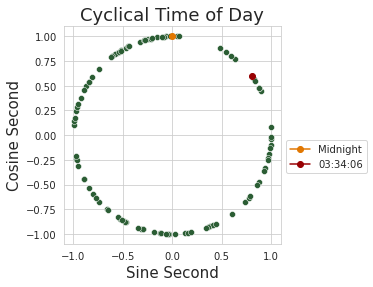

In [29]:
# plot time of day in terms of cyclical coordinates

# plot midnight coordinates
plt.plot(np.sin(2 * np.pi * first_midnight / sec_in_day), 
         np.cos(2 * np.pi * first_midnight / sec_in_day), 
         color=mp.colors(5), marker='o', label='Midnight')

# get time information to display first observation
first_time = df['time_created'][0]
first_second = (first_time - first_midnight) % sec_in_day

# plot first observation coordinates
plt.plot(np.sin(2 * np.pi * first_second / sec_in_day), 
         np.cos(2 * np.pi * first_second / sec_in_day), 
         color=mp.colors(2), marker='o', 
         label=str(pd.to_datetime(first_time, unit='s').time()))

# plot random observations coordinates
sns.scatterplot(x='sin_second', y='cos_second', data=df.sample(100), 
                color=mp.colors(4)).set_aspect('equal')

plt.xlabel('Sine Second', fontsize=15)
plt.ylabel('Cosine Second', fontsize=15)

plt.legend(bbox_to_anchor=(1.0, 0.5), fontsize=10)
plt.title('Cyclical Time of Day', fontsize=18);

> **DAY OF THE WEEK FEATURE**

I would like to extract the day of the week information from the time data.  
There may be a trend related to when the titles were posted during the week.

In [30]:
# extract day of the week feature
df['day'] = pd.to_datetime(df['time_created'], unit='s').dt.day_name()
df.head(8)

,time_created,date_created,up_votes,title,over_18,author,sin_second,cos_second,day
0,1201232046,2008-01-25,3,Scores killed in Pakistan clashes,False,polar,0.804116,0.594472,Friday
1,1201232075,2008-01-25,2,Japan resumes refuelling mission,False,polar,0.805368,0.592775,Friday
2,1201232523,2008-01-25,3,US presses Egypt on Gaza border,False,polar,0.824250,0.566226,Friday
3,1201233290,2008-01-25,1,Jump-start economy: Give health care to all,False,fadi420,0.854534,0.519395,Friday
4,1201274720,2008-01-25,4,Council of Europe bashes EU&UN terror blacklist,False,mhermans,-0.780794,-0.624789,Friday
5,1201287889,2008-01-25,15,Hay presto! Farmer unveils the illegal mock-...,False,Armagedonovich,-0.960273,0.279061,Friday
6,1201289438,2008-01-25,5,"Strikes, Protests and Gridlock at the Poland-U...",False,Clythos,-0.922818,0.385235,Friday
7,1201536662,2008-01-28,0,The U.N. Mismanagement Program,False,Moldavite,-0.889084,-0.457745,Monday


I'll do a quick check on which posting days got the most up votes.

In [31]:
# sort posting days by number of up votes
df.groupby(['day'], as_index=False).sum()[['day', 'up_votes']].sort_values(
    'up_votes', ascending=False)

,day,up_votes
6,Wednesday,8720880.0
5,Tuesday,8660319.0
4,Thursday,8375428.0
1,Monday,8374060.0
0,Friday,8163035.0
3,Sunday,7447386.0
2,Saturday,7413648.0


More users are active on this subreddit during the weekdays, possible while at work.  
Given that it has a news theme, this is not too surprising.

In [32]:
# convert day of the week column to smaller Pandas data type
df['day'] = df['day'].astype('category')
# show new memory size
current_memory = df.memory_usage().sum() / BYTES_PER_MEBIBYTE
print(f'New Memory Size: {current_memory:.3f} MiB')

New Memory Size: 25.254 MiB


> **USER TRENDS OVER TIME**

Before I go on to the second version of the data that I want to use, I would like to observe a few statistical plots.

First, I will set DataFrame to be time indexed and sorted to help with visualizations.

In [33]:
# create time index and sort it
df.set_index(pd.to_datetime(df['time_created'], unit='s'), inplace=True)
df.sort_index(inplace=True)
df.head(3)

,time_created,date_created,up_votes,title,over_18,author,sin_second,cos_second,day
time_created,,,,,,,,,
2008-01-25 03:34:06,1201232046,2008-01-25,3,Scores killed in Pakistan clashes,False,polar,0.804116,0.594472,Friday
2008-01-25 03:34:35,1201232075,2008-01-25,2,Japan resumes refuelling mission,False,polar,0.805368,0.592775,Friday
2008-01-25 03:42:03,1201232523,2008-01-25,3,US presses Egypt on Gaza border,False,polar,0.824250,0.566226,Friday


I can see that both the time created and date created features are redundant.  
If needed, I can always extract time details, such as year, month, etc, from the index.

In [34]:
# remove redundant time data
df.drop(['time_created', 'date_created'], axis=1, inplace=True)
# show new memory size
current_memory = df.memory_usage().sum() / BYTES_PER_MEBIBYTE
print(f'New Memory Size: {current_memory:.3f} MiB')

New Memory Size: 21.369 MiB


In [35]:
# show memory reduction from initial size
print(f'Memory Size Reduction:\
    {np.int((START_MEMORY - current_memory) / START_MEMORY * 100)}%')

Memory Size Reduction:    22%


The memory footprint is reduced, even after adding features.

First, I'll have a simple look at how the number of daily posts has increased on this subreddit.

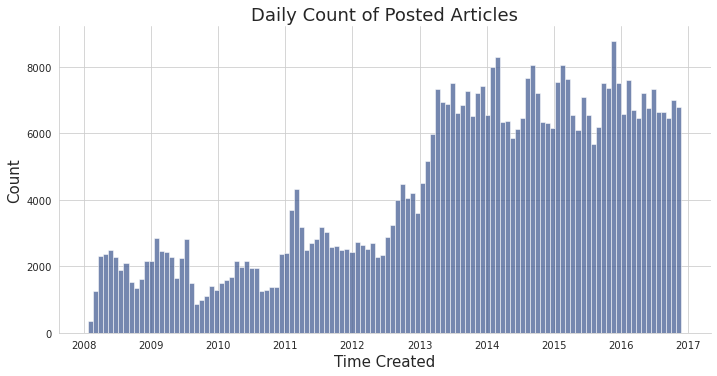

In [36]:
# plot number of articles posted per day

sns.displot(df.index, height=5, aspect=2, color=mp.colors(0))

plt.xlabel('Time Created', fontsize=15)
plt.ylabel('Count', fontsize=15)

plt.title('Daily Count of Posted Articles', fontsize=18);

There was a large increase in posting activity, starting around 2013.  
I'll plot the activity, cumulatively, to better show the trend.

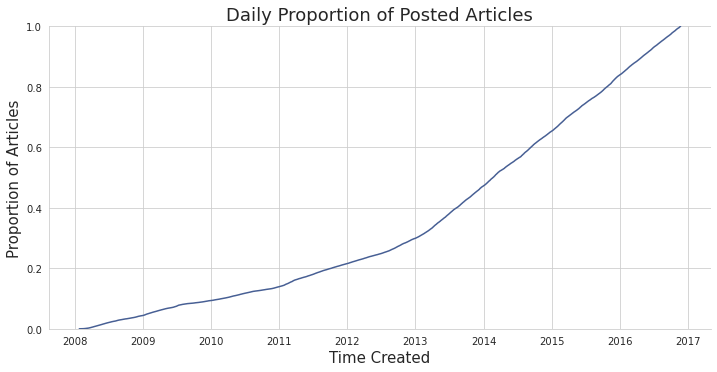

In [37]:
# plot proportion of articles posted per day

sns.displot(df.index, kind='ecdf', height=5, aspect=2, color=mp.colors(0))

plt.xlabel('Time Created', fontsize=15)
plt.ylabel('Proportion of Articles', fontsize=15)

plt.title('Daily Proportion of Posted Articles', fontsize=18);

Similarly, the daily up votes increase, as we look forward in time.

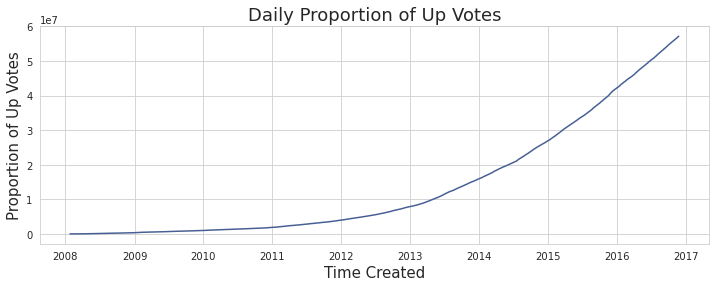

In [38]:
# plot proportion of up votes posted per day

sns.lineplot(x=df.index, y=df['up_votes'].cumsum())

plt.xlabel('Time Created', fontsize=15)
plt.ylabel('Proportion of Up Votes', fontsize=15)

plt.title('Daily Proportion of Up Votes', fontsize=18);

Finally, I will show some monthly moving window plots.  
Both daily and monthly windows will be calculated.

First, I'll observe the average number of up votes.

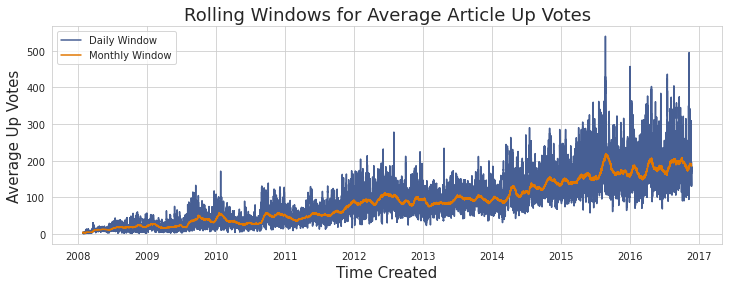

In [39]:
# plot average daily number of up votes vs daily averages with monthly rolling window

sns.lineplot(x=df.index, y=df['up_votes'].rolling('d').mean(), 
             label='Daily Window', color=mp.colors(0))
sns.lineplot(x=df.index, y=df['up_votes'].rolling('30d').mean(), 
             label='Monthly Window', color=mp.colors(5))

plt.xlabel('Time Created', fontsize=15)
plt.ylabel('Average Up Votes', fontsize=15)

plt.legend(loc=2)
plt.title('Rolling Windows for Average Article Up Votes', fontsize=18);

The daily up vote average shows a steady increase.  
Each article is getting more viewers, as the subreddit adds more followers.

Finally, I'll show the total number of up votes.

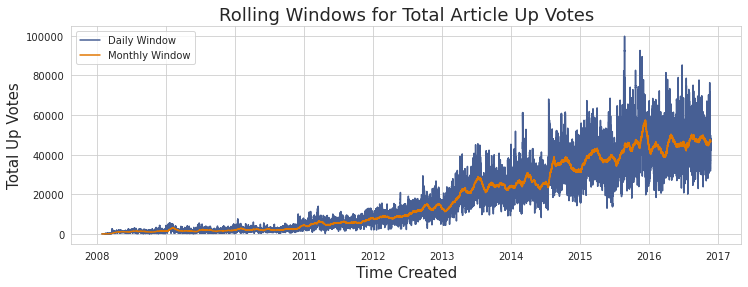

In [40]:
# plot total daily number of up votes vs daily totals with monthly rolling window

sns.lineplot(x=df.index, y=df['up_votes'].rolling('d').sum(), 
             label='Daily Window', color=mp.colors(0))
sns.lineplot(x=df.index, y=df['up_votes'].rolling('30d').sum() / 30, 
             label='Monthly Window', color=mp.colors(5))

plt.xlabel('Time Created', fontsize=15)
plt.ylabel('Total Up Votes', fontsize=15)

plt.legend(loc=2)
plt.title('Rolling Windows for Total Article Up Votes', fontsize=18);

The total daily up votes increase more rapidly than the average daily up votes.  
This implies that the number of articles posted doubled faster than the average number of up votes each article received.  
Increasing the number of articles is a more effective way of driving up user participation than having more popular articles.  
Although, increases to both should be desired.

> **AUTHOR DATA**

I will create an author focused DataFrame to observe statistics about the authors.  
The up votes and over 18 features will be summed, like in the original DataFrame.  
The time created feature will be converted into the first and last times that the authors contributed.  
The title counts will be calculated for each author, and the text of their titles will be stored in lists.

In [41]:
def create_author_df(data):
    """Returns aggregated author DataFrame with posting time data"""
    gb = data.reset_index().groupby('author')
    df = gb.agg(
        up_votes=('up_votes', np.sum), 
        over_18=('over_18', np.sum), 
        first_post=('time_created', np.min), 
        last_post=('time_created', np.max), 
        most_active_day=('day', lambda x: x.value_counts().index[0]), 
        num_posts=('up_votes', 'count'))
    df.loc[:, 'titles'] = gb['title'].apply(list)
    
    return df

In [42]:
# generate author DataFrame
author_df = create_author_df(df)
author_df.head(3)

,up_votes,over_18,first_post,last_post,most_active_day,num_posts,titles
author,,,,,,,
---SB,1.0,0,2013-08-15 04:53:16,2013-08-15 04:53:16,Thursday,1,[BBC News - Former headmaster resigns over For...
---annon---,0.0,0,2014-05-13 14:20:11,2014-05-13 14:20:11,Tuesday,1,"[H.R. Giger, designer of alien from Alien film..."
---sniff---,102.0,0,2009-06-07 20:23:44,2009-08-05 23:40:52,Monday,5,"[The wife of Mir Hossein Mousavi, Ahmadinejad’..."


First, I want to inspect the posts that were for articles intended for readers over the age of 18.

In [43]:
# count all over 18 articles
over_18 = df.loc[df['over_18'] == 1]
print(f'There are {over_18.shape[0]} out of {df.shape[0]:,d} articles for readers over 18.\
\nThey account for {over_18.shape[0] / df.shape[0] * 100:.2f}% of the articles.')

There are 320 out of 509,236 articles for readers over 18.
They account for 0.06% of the articles.


In [44]:
# observe author with most over 18 posts
most_over_18_author = author_df.loc[author_df['over_18'] == 
                                    author_df['over_18'].max()]
print(f'The author {most_over_18_author.index[0]} posted the most over 18 articles.\n\
These {most_over_18_author.over_18[0]} articles accounted for \
{most_over_18_author.over_18[0] / most_over_18_author.num_posts[0] * 100:.2f}\
% of this author\'s posts.')

The author readerseven posted the most over 18 articles.
These 6 articles accounted for 0.19% of this author's posts.


It seems that there are relatively few articles in this group.  
Even the author with the most such posts, had very few.

In [45]:
# inspect data types
author_df.dtypes

up_votes                  float64
over_18                     int64
first_post         datetime64[ns]
last_post          datetime64[ns]
most_active_day            object
num_posts                   int64
titles                     object
dtype: object

I want to reduce the memory footprint of these numerical columns.

In [46]:
# get maximum values of numerical data
print(f'Largest values:   \
up votes => {author_df.up_votes.max():,}   \
over 18 => {author_df.over_18.max()}   \
num_posts => {author_df.num_posts.max():,}')

Largest values:   up votes => 1,985,416.0   over 18 => 6   num_posts => 8,897


In [47]:
# show range of values that can be cast as Numpy 16 bit integer
np.iinfo(np.int8), np.iinfo(np.int16), np.iinfo(np.int32)

(iinfo(min=-128, max=127, dtype=int8),
 iinfo(min=-32768, max=32767, dtype=int16),
 iinfo(min=-2147483648, max=2147483647, dtype=int32))

In [48]:
# convert numerical columns to smaller Numpy data types
author_df['up_votes'] = author_df['up_votes'].astype('int32')
author_df['over_18'] = author_df['over_18'].astype('int8')
author_df['num_posts'] = author_df['num_posts'].astype('int16')

I'm going to make the most active day a categorical data type, as well.

In [49]:
# convert day of the week column to smaller Pandas data type
author_df['most_active_day'] = author_df['most_active_day'].astype('category')

Now, I'll compare some statistics of these articles with the set, as a whole.

In [50]:
# compare average number of up votes for over 18 articles vs. all articles
print(f'The average over 18 article received {over_18.up_votes.mean():.0f} up votes.\n\
The average number of up votes across all articles was {df.up_votes.mean():.0f}.')

The average over 18 article received 380 up votes.
The average number of up votes across all articles was 112.


The over 18 articles receive over 3 times the number of up votes, on average.

In [51]:
# compare percent of over 18 articles out of all articles

print(f'Over 18 articles received {over_18.up_votes.sum() / df.up_votes.sum() * 100:.2f}\
% of the upvotes.\n\
They comprised only {over_18.shape[0] / df.shape[0] * 100:.2f}\
% of the total number of articles.')

Over 18 articles received 0.21% of the upvotes.
They comprised only 0.06% of the total number of articles.


The up votes for over 18 articles have a stronger relevance than their count would suggest.  
I will keep this feature, as it may provide the models with useful information.

Now, I'll find the authors with the most upvotes.

In [52]:
# observe top 8 authors with highest average up vote
author_df.loc[(author_df['up_votes'] / author_df['num_posts']).nlargest(8).index]

,up_votes,over_18,first_post,last_post,most_active_day,num_posts,titles
author,,,,,,,
navysealassulter,12333,0,2015-08-23 22:09:28,2015-08-23 22:09:28,Sunday,1,[The police officer who leaked the footage of ...
seapiglet,11288,0,2015-08-18 23:06:08,2015-08-18 23:06:08,Tuesday,1,[Paris shooting survivor suing French media fo...
DawgsOnTopUGA,10515,0,2015-08-20 00:30:33,2015-08-20 00:30:33,Thursday,1,[ISIS beheads 81-year-old pioneer archaeologis...
Flamo_the_Idiot_Boy,10289,0,2016-05-31 06:31:42,2016-05-31 06:31:42,Tuesday,1,[Every reference to the Great Barrier Reef rem...
haunted_cheesecake,9408,0,2015-08-12 18:11:47,2015-08-12 18:11:47,Wednesday,1,[Huge explosion reported in Chinese port city ...
bendertheoffender22,8781,0,2015-03-13 10:30:55,2015-03-13 10:30:55,Friday,1,"[German anti-vaccer wagers € 100,000 to anyone..."
crippledrejex,8601,0,2015-08-18 14:02:49,2015-08-18 14:02:49,Tuesday,1,[Afghan military interpreter who served with B...
FlandersNed,8446,0,2016-10-29 03:43:42,2016-10-29 03:43:42,Saturday,1,[The South Korean President has been under the...


These authors received all their votes through single postings.  
I want to know the influence that single article posters have on the dataset.  
I'll find out the percentage of authors who posted a single title.

In [53]:
# get percent of authors who posted just one time
single_poster = author_df['num_posts'] == 1
num_single_poster = author_df.loc[single_poster].shape[0]
print(f'{num_single_poster / author_df.shape[0] * 100:.2f}% of authors \
posted only one title.')

63.65% of authors posted only one title.


In [54]:
# get percent of titles comprising one time posters
num_posts = author_df['num_posts'].sum()
print(f'{num_single_poster / num_posts * 100:.2f}% of all articles \
were posted by authors with just one posting.')

10.73% of all articles were posted by authors with just one posting.


A majority of the authors are not repeat contributors, but their articles make up a small fraction of all the postings.  
I believe that authors with numerous postings and higher than average up votes are significant subreddit contributors.

I will sort the author DataFrame by the top up voted authors.

In [55]:
# sort DataFrame of authors by total up votes
author_df.sort_values(['up_votes'], ascending=False, inplace=True)
author_df.head()

,up_votes,over_18,first_post,last_post,most_active_day,num_posts,titles
author,,,,,,,
maxwellhill,1985416,0,2008-03-18 07:09:38,2016-11-22 01:13:37,Sunday,4023,[Chinese Premier accuses Dalai Lama of masterm...
anutensil,1531544,0,2009-12-03 20:18:10,2016-11-21 11:23:46,Thursday,5730,"[Top 10 discoveries of 2009, Mystery behind wh..."
Libertatea,832102,1,2012-10-22 12:02:43,2016-07-05 13:51:58,Tuesday,2108,[Life inside the Ecuadorian embassy with Wikil...
DoremusJessup,584380,0,2011-12-21 15:17:44,2016-11-19 01:53:54,Monday,5037,[Human Rights Watch claims $32 billion missing...
Wagamaga,580121,0,2014-08-06 08:55:55,2016-08-13 21:13:26,Tuesday,1490,[The government wants penalties including pote...


I'll observe the form the titles take in this DataFrame.

In [56]:
# grab titles of first 10 articles posted by top author
author_df.loc['maxwellhill']['titles'][:10]

['Chinese Premier accuses Dalai Lama of masterminding recent violence in Tibet',
 'China warns of  life and death struggle  over Tibet ',
 ' I am worried. China is so big. Tibetans are so few. We cannot possibly win. No good can come of this for Tibetans. ',
 'Italian judge clears way for trial in absentia against 26 CIA agents ',
 'In 1968, fury at the Vietnam war sparked protests and uprisings across the world: from Paris and Prague to Mexico. Where has all the rage gone?',
 'The woman who nearly stopped the Iraq war',
 'Web host suspends site planned for anti-Koran film ',
 'Britain s GCHQ spy agency confirms violent riots in Tibet staged by Chinese PLA agents posing as monks',
 'German chancellor Merkel to boycott Olympic ceremony ',
 'Venezuela sends to China all the oil it previously shipped to U.S. refinery jointly owned with Exxon Mobil']

This will be useful for NLP analysis by author.

Now, I'll observe the up vote distribution across the authors.

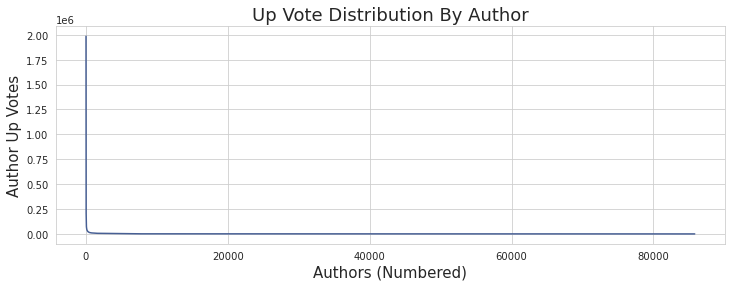

In [57]:
# plot upvotes by all authors

sns.lineplot(data=author_df, 
            x=range(len(author_df.index)), 
            y='up_votes')

plt.xlabel('Authors (Numbered)', fontsize=15)
plt.ylabel('Author Up Votes', fontsize=15)

plt.title('Up Vote Distribution By Author', fontsize=18);

The distribution is dominated by the authors with very low up vote totals.  
I'll observe closer, through the percentile distibution of the up votes.

In [58]:
# show percentile distribution of up votes by author
author_df['up_votes'].describe(
    percentiles=np.array(range(1, 11)) / 10).drop(
    ['mean', 'count', 'std', '100%']).to_frame().T

,min,10%,20%,30%,40%,50%,60%,70%,80%,90%,max
up_votes,0.0,0.0,1.0,3.0,5.0,9.0,16.0,36.0,123.0,789.0,1985416.0


Since the distribution is top heavy, I'll leave off the last 10% during visualization.

In [59]:
percent_up_vote_df = author_df['up_votes'].describe(
    percentiles=np.array(range(1, 11)) / 10).drop(
    ['mean', 'count', 'std', '100%', 'max']).to_frame()
percent_up_vote_df.T

,min,10%,20%,30%,40%,50%,60%,70%,80%,90%
up_votes,0.0,0.0,1.0,3.0,5.0,9.0,16.0,36.0,123.0,789.0


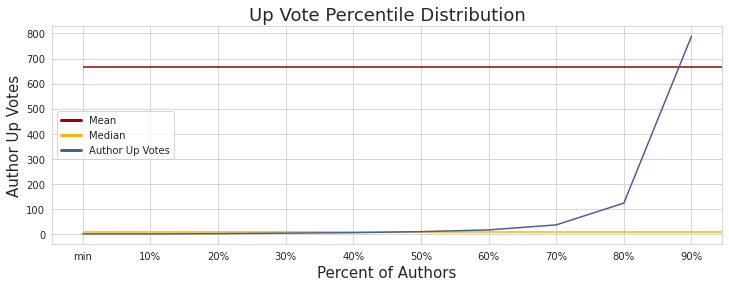

In [60]:
# plot percentiles of up votes

colors = [mp.colors(2), mp.colors(3), mp.colors(0)]
lines = [Line2D([0], [0], color=c, linewidth=3, linestyle='-') for c in colors]
labels = ['Mean', 'Median', 'Author Up Votes']

plt.hlines(author_df['up_votes'].mean(), 0, 10, color=colors[0])
plt.hlines(author_df['up_votes'].median(), 0, 10, color=colors[1])

sns.lineplot(data=percent_up_vote_df, 
             x=percent_up_vote_df.index, 
             y=percent_up_vote_df['up_votes'], 
             color=colors[2])

plt.xlabel('Percent of Authors', fontsize=15)
plt.ylabel('Author Up Votes', fontsize=15)

plt.legend(lines, labels, loc=6)
plt.title('Up Vote Percentile Distribution', fontsize=18);

It is clear that titles from only a handful of authors contribute to a large portion of the up votes.  
I'll break the authors up into the top and bottom 25% of those contributing to all up votes.  
The authors in the middle 50% will comprise the third group.

I'll compute the running total of up votes, going from the least to the most up voted authors.

In [61]:
# get running total of up votes sorted by top author
running_up_votes = author_df['up_votes'][::-1].cumsum()[::-1]
running_up_votes.head(8)

author
maxwellhill        57154756
anutensil          55169340
Libertatea         53637796
DoremusJessup      52805694
Wagamaga           52221314
NinjaDiscoJesus    51641193
madazzahatter      51148611
madam1             50719645
Name: up_votes, dtype: int64

In [62]:
# get top most up voted authors who accounted for 25% of all up votes
top_author_idx = running_up_votes.loc[
    running_up_votes > author_df['up_votes'].sum() * 0.75].index
print(f'The top {len(top_author_idx)} authors contributed to 25% of the upvotes.')

The top 60 authors contributed to 25% of the upvotes.


In [63]:
# get least most up voted authors who accounted for 25% of all up votes
bottom_author_idx = running_up_votes.loc[
    running_up_votes < author_df['up_votes'].sum() * 0.25].index
print(f'The bottom {len(bottom_author_idx):,} authors contributed to 25% of the upvotes.')

The bottom 82,785 authors contributed to 25% of the upvotes.


In [64]:
# get middle up voted authors who accounted for 50% of all up votes
middle_author_idx = author_df.index.drop(top_author_idx.append(bottom_author_idx))
print(f'The middle {len(middle_author_idx):,} authors contributed to 50% of the upvotes.')

The middle 2,993 authors contributed to 50% of the upvotes.


This shows that the click-through rate is heavily influenced by relatively few authors.  
I'll plot the three groups, separately.

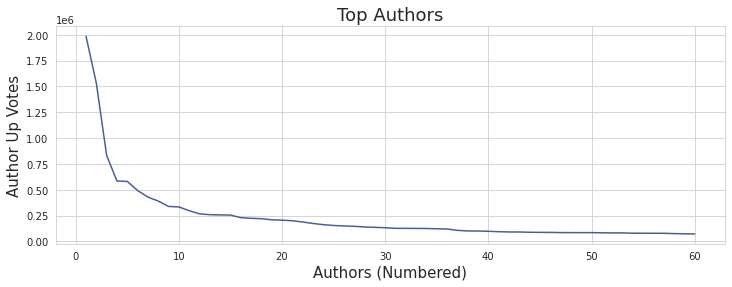

In [65]:
# plot top authors

first_author = 1
last_author = len(top_author_idx)
sns.lineplot(data=author_df[first_author - 1:last_author], 
             x=range(first_author, last_author + 1), 
             y='up_votes')

plt.xlabel('Authors (Numbered)', fontsize=15)
plt.ylabel('Author Up Votes', fontsize=15)

plt.title('Top Authors', fontsize=18);

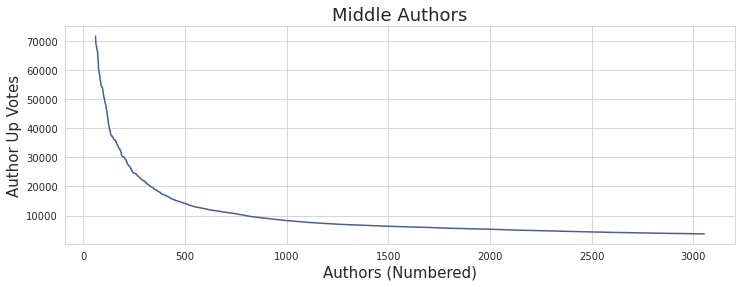

In [66]:
# plot middle authors

first_author = len(top_author_idx) + 1
last_author = len(middle_author_idx) + len(top_author_idx)
sns.lineplot(data=author_df[first_author - 1:last_author], 
             x=range(first_author, last_author + 1), 
             y='up_votes')

plt.xlabel('Authors (Numbered)', fontsize=15)
plt.ylabel('Author Up Votes', fontsize=15)

plt.title('Middle Authors', fontsize=18);

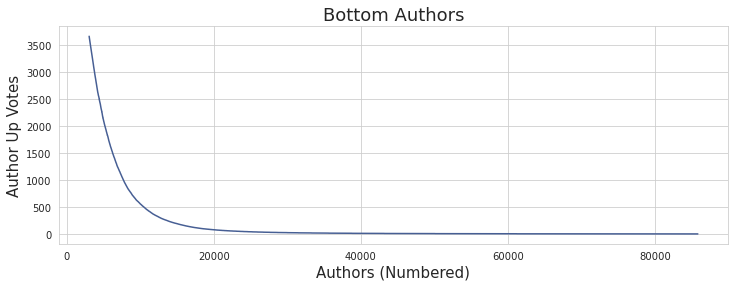

In [67]:
# plot bottom authors

first_author = len(middle_author_idx) + len(top_author_idx) + 1
last_author = len(author_df.index)
sns.lineplot(data=author_df[first_author - 1:last_author], 
             x=range(first_author, last_author + 1), 
             y='up_votes')

plt.xlabel('Authors (Numbered)', fontsize=15)
plt.ylabel('Author Up Votes', fontsize=15)

plt.title('Bottom Authors', fontsize=18);

Now that I have the authors divided into 3 groups, I'll assign them to categorical values.  
This categorical label can be used as a target for prediction.  
It will be useful to train a model to predict which authors have the best chance of receiving of up votes.

In [68]:
# create categorical feature to rank the authors by their total up votes
idx_lst = [top_author_idx, middle_author_idx, bottom_author_idx]
rank_lst = ['top', 'middle', 'bottom']
# create new feature
author_df = author_df.assign(rank=pd.concat(
    [pd.Series(rank, idx) for rank, idx in zip(rank_lst, idx_lst)]))
# convert rank feature to categorical
author_df['rank'] = author_df['rank'].astype('category')
author_df

,up_votes,over_18,first_post,last_post,most_active_day,num_posts,titles,rank
author,,,,,,,,
maxwellhill,1985416,0,2008-03-18 07:09:38,2016-11-22 01:13:37,Sunday,4023,[Chinese Premier accuses Dalai Lama of masterm...,top
anutensil,1531544,0,2009-12-03 20:18:10,2016-11-21 11:23:46,Thursday,5730,"[Top 10 discoveries of 2009, Mystery behind wh...",top
Libertatea,832102,1,2012-10-22 12:02:43,2016-07-05 13:51:58,Tuesday,2108,[Life inside the Ecuadorian embassy with Wikil...,top
DoremusJessup,584380,0,2011-12-21 15:17:44,2016-11-19 01:53:54,Monday,5037,[Human Rights Watch claims $32 billion missing...,top
Wagamaga,580121,0,2014-08-06 08:55:55,2016-08-13 21:13:26,Tuesday,1490,[The government wants penalties including pote...,top
...,...,...,...,...,...,...,...,...
davitruiz,0,0,2013-12-05 17:52:21,2013-12-15 07:19:35,Sunday,2,[Madrid train strike the day before holiday we...,bottom
davie18,0,0,2012-02-01 18:03:03,2012-02-01 18:03:03,Wednesday,1,[Remember that letter to Sainsbury s where a l...,bottom
davidstern350,0,0,2013-08-22 08:12:02,2013-08-22 08:12:02,Thursday,1,[UOSSM Urges the International Organizations t...,bottom


Since I have the time periods that the authors were active, I'll plot the best 60 authors from each group.

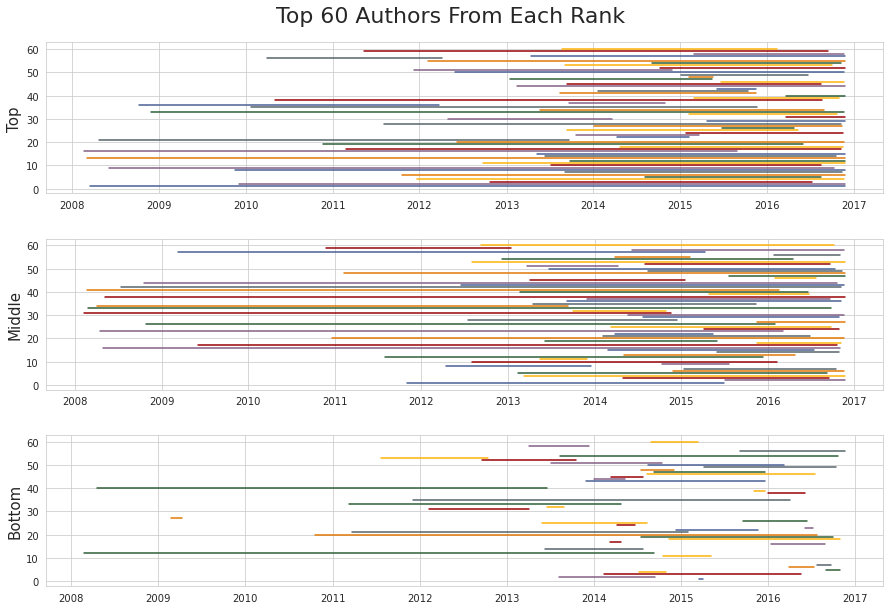

In [69]:
# plot 60 authors from each rank with the most up votes

fig, axes = plt.subplots(3, 1, figsize=(15, 10))

fig.suptitle('Top 60 Authors From Each Rank', size=22, y=0.93)
fig.subplots_adjust(hspace=0.3)

for author, rank, ax in zip(idx_lst, rank_lst, axes.flatten()):
    for idx in range(len(top_author_idx)):
        sns.lineplot(x=author_df.loc[author]
                     [['first_post', 'last_post']].values[idx], 
                     y=idx + 1, ax=ax)
        ax.yaxis.label.set_size(15)
        ax.set(ylabel=rank.capitalize())

The most of top authors with less than 5 years of activity posted in the later years.  
A large proportion of middle authors posted for most of the time span of the observations.  
Almost all of the bottom authors posted for relatively short period of time.

Now that I'm finished using the two time data features for inspection, I'll convert them to one numerical value.  
I'll get the duration of author activity on the subreddit in days.

In [70]:
# calculate number of days authors were posting titles
author_df['days_active'] = (author_df['last_post'] - 
                            author_df['first_post']).dt.days.astype('int16')
# remove timestamp features
author_df.drop(['first_post', 'last_post'], axis=1, inplace=True)
# reorder columns to put rank first and titles last
author_df = author_df[[author_df.columns[x] for x in [0, 1, 2, 3, 5, 6, 4]]]
author_df

,up_votes,over_18,most_active_day,num_posts,rank,days_active,titles
author,,,,,,,
maxwellhill,1985416,0,Sunday,4023,top,3170,[Chinese Premier accuses Dalai Lama of masterm...
anutensil,1531544,0,Thursday,5730,top,2544,"[Top 10 discoveries of 2009, Mystery behind wh..."
Libertatea,832102,1,Tuesday,2108,top,1352,[Life inside the Ecuadorian embassy with Wikil...
DoremusJessup,584380,0,Monday,5037,top,1794,[Human Rights Watch claims $32 billion missing...
Wagamaga,580121,0,Tuesday,1490,top,738,[The government wants penalties including pote...
...,...,...,...,...,...,...,...
davitruiz,0,0,Sunday,2,bottom,9,[Madrid train strike the day before holiday we...
davie18,0,0,Wednesday,1,bottom,0,[Remember that letter to Sainsbury s where a l...
davidstern350,0,0,Thursday,1,bottom,0,[UOSSM Urges the International Organizations t...


I will process the text of the article titles in another notebook.  
Both datasets are ready for the modeling notebooks.  
I will save them, named by their index values.

In [71]:
# save both DataFrames to CSV files
df.to_csv('../data/time_data.csv')
author_df.to_csv('../data/author_data.csv')